# DNN para clasificar perros y gatos

In [1]:
!pip install numpy Pillow Matplotlib pandas seaborn scikit-learn requests scikit-image mlxtend prefixspan scikit-fuzzy umap-learn openpyxl stanza torch torchvision tesseract pytesseract nltk wordcloud spacy tensorflow==2.19.0 tensorflow-datasets opencv-python ucimlrepo nbconvert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 33.3 MB/s eta 0:00:00
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11215 sha256=8683cd2ab83e73a8de6bceafb4394d0d1760923f8fd1c22de353a639e38d8828
  Stored in directory: /root/.cache/pip/wheels/72/36/65/f9e2bbe4998ab4cdf6e7a015f38bdbb6925301dcf2cce34a88
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=300779531da9b7624b57c21e551e217826d2a4a80b1bb1e6adae72ff74a8b7c4
  Stored in directory: /root/.cache/pip/wheels/13/1f/8e/2d6c0e358fd6d01ca80ecd9185a374bcda358

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


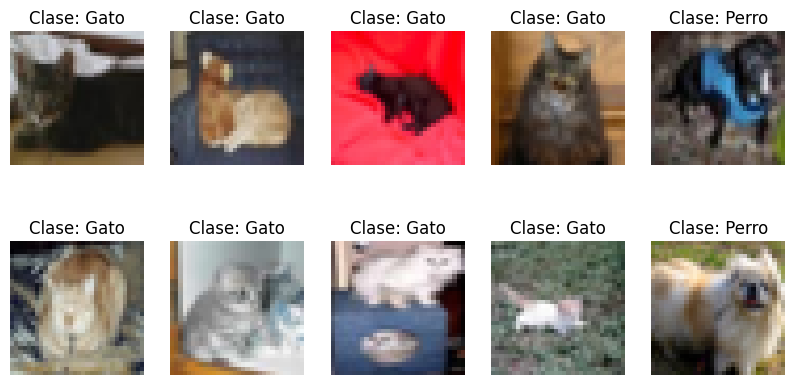

In [3]:
# cargar el dataset CIFAR-10
dataset = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

# vamos a filtrar solamente las etiquetas de perros (clase 5) y gatos (clase 3)
mask = (train_labels == 3) | (train_labels == 5)
train_images, train_labels = train_images[mask.flatten()], train_labels[mask.flatten()]

mask = (test_labels == 3) | (test_labels == 5)
test_images, test_labels = test_images[mask.flatten()], test_labels[mask.flatten()]

# se normalizan las imagenes
train_images, test_images = (
    train_images / 255.0,
    test_images / 255.0,
)  # pixeles entre 0 - 255

# convertir etiquetas: 0 (gato) o 1 (perro)
train_labels = (train_labels == 5).astype(int)
test_labels = (test_labels == 5).astype(int)

# mostramos algunas imagenes antes de entrenar nuestro modelo
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
class_names = ["Gato", "Perro"]

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i])
    ax.set_title(f"Clase: {class_names[train_labels[i][0]]}")
    ax.axis("off")

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5389 - loss: 0.7340 - val_accuracy: 0.5660 - val_loss: 0.6757
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5813 - loss: 0.6675 - val_accuracy: 0.5980 - val_loss: 0.6666
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5960 - loss: 0.6637 - val_accuracy: 0.5915 - val_loss: 0.6711
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5980 - loss: 0.6605 - val_accuracy: 0.5890 - val_loss: 0.6650
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5829 - loss: 0.6645 - val_accuracy: 0.5970 - val_loss: 0.6596
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5971 - loss: 0.6611 - val_accuracy: 0.6060 - val_loss: 0.6558
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5930 - loss: 0.6566 - val_accuracy: 0.5870 - val_loss: 0.6667
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5934 - loss: 0.6593 - val_accuracy: 0

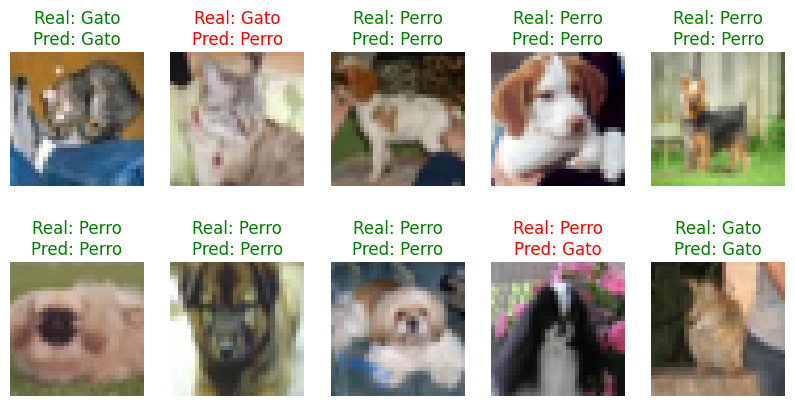

In [4]:
# generamos nuestro modelo de red neuronal profunda
model = keras.Sequential(
    [
        layers.Flatten(
            input_shape=(32, 32, 3)
        ),  # capa de aplanamiento con formato de entrada
        layers.Dense(128, activation="relu"),  # capa oculta densa
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid"),  # capa de salida con activación sigmoide
    ]
)

# Callback de early stopping
early_stopping = EarlyStopping(
    monitor="val_loss",  # monitoreamos la perdida en la validacion
    patience=5,  # establecemos cuantas epocas van a pasar sin mejorar antes de parar
    restore_best_weights=True,  # retornamos los mejores pesos
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


model.fit(
    train_images,
    train_labels,
    epochs=60,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping],
)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

predicciones = (model.predict(test_images) > 0.5).astype(int)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i])
    real_label = class_names[test_labels[i][0]]
    pred_label = class_names[predicciones[i][0]]
    color = "green" if real_label == pred_label else "red"
    ax.set_title(f"Real: {real_label}\nPred: {pred_label}", color=color)
    ax.axis("off")

plt.show()
